<a href="https://colab.research.google.com/github/francisconetodata/portfolio_python/blob/main/demografico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisador de dados demográficos


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('adult.data.csv')

In [3]:
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# Colunas com NA's
df.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
salary            False
dtype: bool

# Início da análise


How many people of each race are represented in this dataset? This should be a Pandas series with race names as the index labels. (`race` column)

In [7]:
import seaborn as sns

In [8]:
race = df.race
race.value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [9]:
race.unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


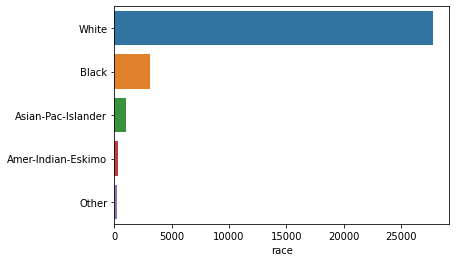

In [10]:
sns.barplot(race.value_counts(),race.unique())

What is the average age of men?

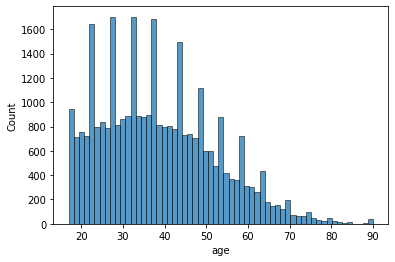

In [11]:
sns.histplot(df.age)

In [12]:
# Média de idade dos homens
df.age.mean()

38.58164675532078

What is the percentage of people who have a Bachelor's degree?

In [13]:
(df.education.value_counts()/len(df.education))*100

HS-grad         32.250238
Some-college    22.391818
Bachelors       16.446055
Masters          5.291607
Assoc-voc        4.244341
11th             3.608612
Assoc-acdm       3.276926
10th             2.865391
7th-8th          1.983969
Prof-school      1.768987
9th              1.578576
12th             1.329812
Doctorate        1.268389
5th-6th          1.022696
1st-4th          0.515955
Preschool        0.156629
Name: education, dtype: float64

A porcentagem de Bachelors é de 16,44%




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


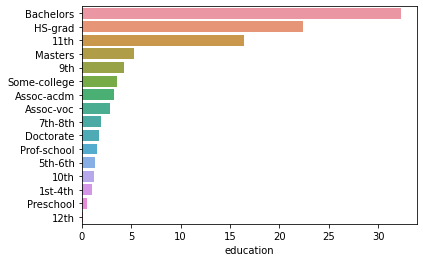

In [14]:
sns.barplot((df.education.value_counts()/len(df.education))*100,
            df.education.unique())

What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K? 

What is the minimum number of hours a person works per week?



In [15]:
advi = df[['education','salary']]
advi.head(3)

,education,salary
0,Bachelors,<=50K
1,Bachelors,<=50K
2,HS-grad,<=50K


In [16]:
advi = advi[advi.salary == '>50K']
advi

,education,salary
7,HS-grad,>50K
8,Masters,>50K
9,Bachelors,>50K
10,Some-college,>50K
11,Bachelors,>50K
...,...,...
32539,Doctorate,>50K
32545,Assoc-acdm,>50K
32554,Masters,>50K
32557,HS-grad,>50K


In [17]:
(advi.education.value_counts()/len(advi.education))*100

Bachelors       28.325469
HS-grad         21.362071
Some-college    17.689070
Masters         12.230583
Prof-school      5.394720
Assoc-voc        4.604005
Doctorate        3.902563
Assoc-acdm       3.379671
10th             0.790715
11th             0.765209
7th-8th          0.510139
12th             0.420865
9th              0.344344
5th-6th          0.204056
1st-4th          0.076521
Name: education, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


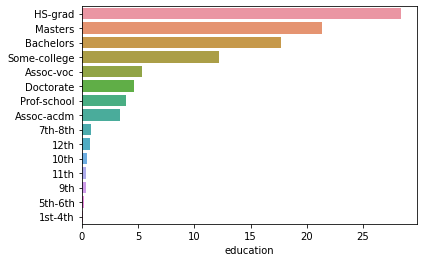

In [18]:
sns.barplot((advi.education.value_counts()/len(advi.education))*100,
            advi.education.unique())

What is the minimum number of hours a person works per week? 

What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?

In [19]:
df['hours-per-week'].describe()
# Mínimo de 1 hora

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [20]:
adver = df[['salary','hours-per-week']]
adver = adver[adver.salary == '>50K']
adver = adver[adver['hours-per-week'] == 1]
adver.head()
# apenas duas pessoas

,salary,hours-per-week
189,>50K,1
20072,>50K,1


What country has the highest percentage of people that earn >50K and what is that percentage?

Identify the most popular occupation for those who earn >50K in India. 

In [21]:
pais = df[['salary','native-country']]
pais.head(3)

,salary,native-country
0,<=50K,United-States
1,<=50K,United-States
2,<=50K,United-States


In [22]:
pais = pais[pais.salary == '>50K']
pais.value_counts()

salary  native-country    
>50K    United-States         7171
        ?                      146
        Philippines             61
        Germany                 44
        India                   40
        Canada                  39
        Mexico                  33
        England                 30
        Cuba                    25
        Italy                   25
        Japan                   24
        China                   20
        Taiwan                  20
        Iran                    18
        South                   16
        Poland                  12
        France                  12
        Puerto-Rico             12
        Jamaica                 10
        El-Salvador              9
        Greece                   8
        Cambodia                 7
        Hong                     6
        Yugoslavia               6
        Vietnam                  5
        Ireland                  5
        Haiti                    4
        Portugal            

In [23]:
india = df[['salary','native-country','occupation']]
india = india[india.salary == '>50K']
india = india[india['native-country']=='India']
india.head()


,salary,native-country,occupation
11,>50K,India,Prof-specialty
968,>50K,India,Exec-managerial
1327,>50K,India,Other-service
7258,>50K,India,Prof-specialty
7285,>50K,India,Prof-specialty


In [24]:
india.value_counts()

salary  native-country  occupation      
>50K    India           Prof-specialty      25
                        Exec-managerial      8
                        Tech-support         2
                        Other-service        2
                        Transport-moving     1
                        Sales                1
                        Adm-clerical         1
dtype: int64